## Pneumonia Detection Using Deep Learning Convolutional Neural Network (CNN)

### Thanh Nguyen-Duong
### DSC 680  Project 3
### 11/3/2020


*********************

In [13]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from glob import glob
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, SGD, RMSprop 
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
import cv2


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os

for dirname, _, filenames in os.walk(r"C:\Users\t.nguyen\Desktop\DSC 680 Project 3\data"):
    for filename in filenames:
        os.path.join(dirname, filename)


In [4]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_training_data(r'C:\Users\t.nguyen\Desktop\DSC 680 Project 3\data\chest_xray\chest_xray\train')
test = get_training_data(r'C:\Users\t.nguyen\Desktop\DSC 680 Project 3\data\chest_xray\chest_xray\test')
val = get_training_data(r'C:\Users\t.nguyen\Desktop\DSC 680 Project 3\data\chest_xray\chest_xray\val')


OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



### Total X-ray images distribution between Pneumonia lungs vs. Healthy lungs

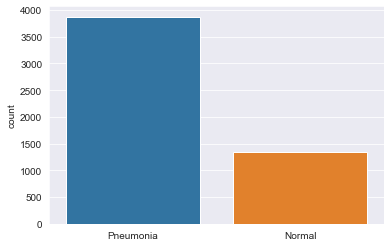

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l) 
plt.show()

The data distribution is imbalanced as there are more pneumonia lungs images compared to normal lungs images

#### Looking at how X-ray Images are different between Lungs with pneumonia vs. healthy lungs

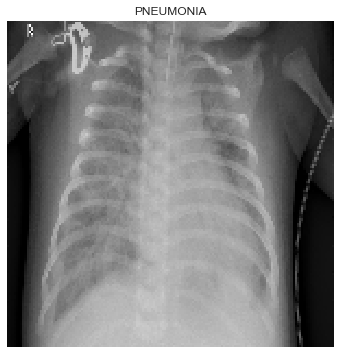

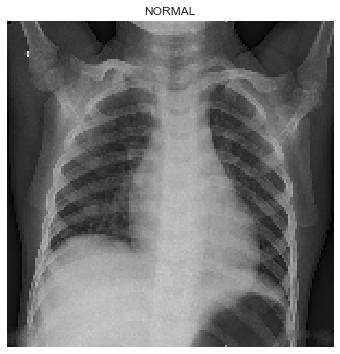

In [7]:
plt.figure(figsize = (6,6))
plt.imshow(train[0][0], cmap='gray')
plt.axis('off')
plt.title(labels[train[0][1]])

plt.figure(figsize = (6,6))
plt.imshow(train[-1][0], cmap='gray')
plt.axis('off')
plt.title(labels[train[-1][1]])

plt.show()

In [8]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
    
for feature, label in val:
    X.append(feature)
    y.append(label)


# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [9]:
# Normalize the data

X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

#### Data Augmentation

This step will balance out the imbalance in our dataset and prevent overfitting of the model 

In [10]:
# Data Augmentation will prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range = 90, 
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip = True,
        vertical_flip=False) 


datagen.fit(X_train)

For the data augmentation, i choosed to :

- Randomly rotate some training images by 90 degrees
- Randomly Zoom by 10% some training images
- Randomly shift images horizontally by 10% of the width
- Randomly shift images vertically by 10% of the height
- Randomly flip images horizontally. Once our model is ready, we fit the training dataset.

### Training the Model


In [11]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [16]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(X_val, y_val) ,callbacks = [learning_rate_reduction])


Epoch 1/12
118/118 [==============================] - 206s 2s/step - loss: 0.6352 - accuracy: 0.8081 - val_loss: 10.0572 - val_accuracy: 0.7407
Epoch 2/12
118/118 [==============================] - 174s 1s/step - loss: 0.3657 - accuracy: 0.8570 - val_loss: 8.2067 - val_accuracy: 0.7407
Epoch 3/12
118/118 [==============================] - ETA: 0s - loss: 0.3178 - accuracy: 0.8748
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
118/118 [==============================] - 180s 2s/step - loss: 0.3178 - accuracy: 0.8748 - val_loss: 45.2111 - val_accuracy: 0.7407
Epoch 4/12
118/118 [==============================] - 197s 2s/step - loss: 0.2275 - accuracy: 0.9162 - val_loss: 14.6748 - val_accuracy: 0.7407
Epoch 5/12
118/118 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9234
Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
118/118 [==============================] - 186s 2s/step - loss: 0.2086 - accuracy: 0

In [18]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

37/37 [==============================] - 5s 135ms/step - loss: 0.2065 - accuracy: 0.9164
Loss of the model is -  0.20651587843894958
37/37 [==============================] - 5s 135ms/step - loss: 0.2065 - accuracy: 0.9164
Accuracy of the model is -  91.63822531700134 %


#### Looking at our model training

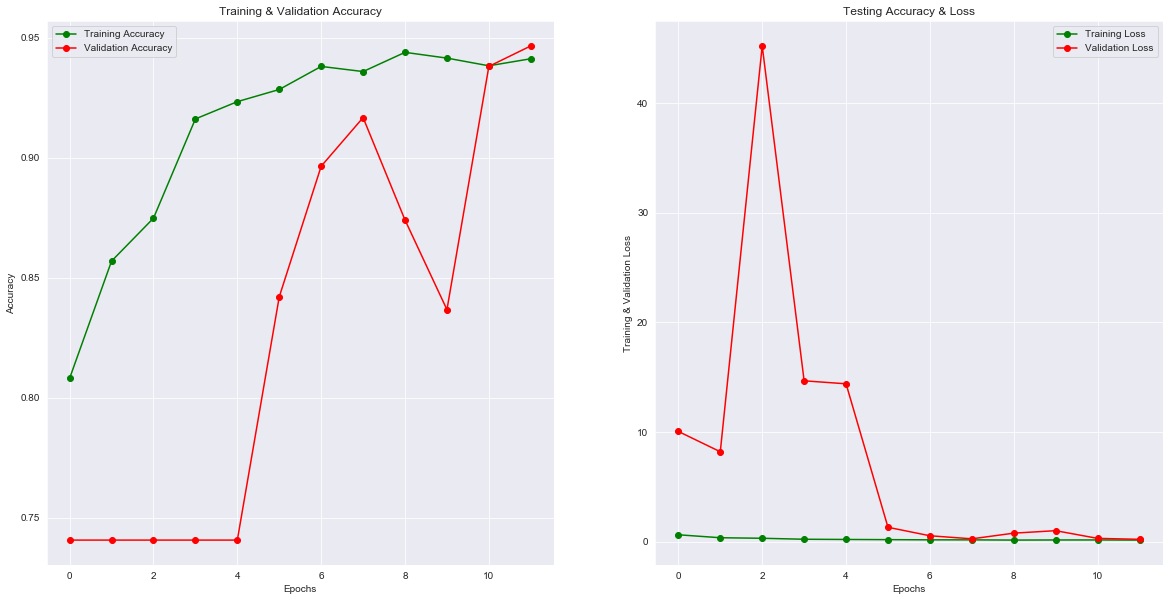

In [19]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

#### Precision vs. Recall and ROC

In [32]:
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)

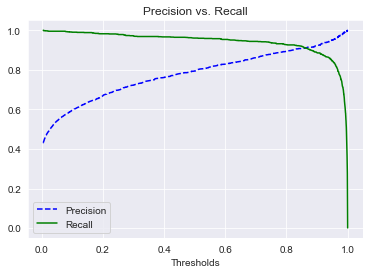

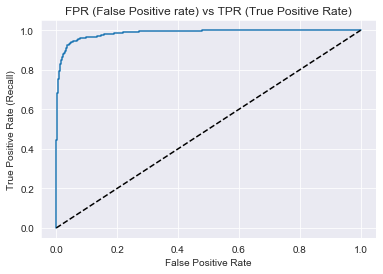

In [22]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [29]:
predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [33]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.99      0.89      0.94       843
   Normal (Class 1)       0.78      0.97      0.87       329

           accuracy                           0.92      1172
          macro avg       0.89      0.93      0.90      1172
       weighted avg       0.93      0.92      0.92      1172



In [35]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

#### Creating the confusion matrix

In [39]:
cmatrix = confusion_matrix(y_test,predictions)
cmatrix = pd.DataFrame(cmatrix , index = ['0','1'] , columns = ['0','1'])
cmatrix

,0,1
0,754,89
1,9,320


#### Plotting the confusion matrix

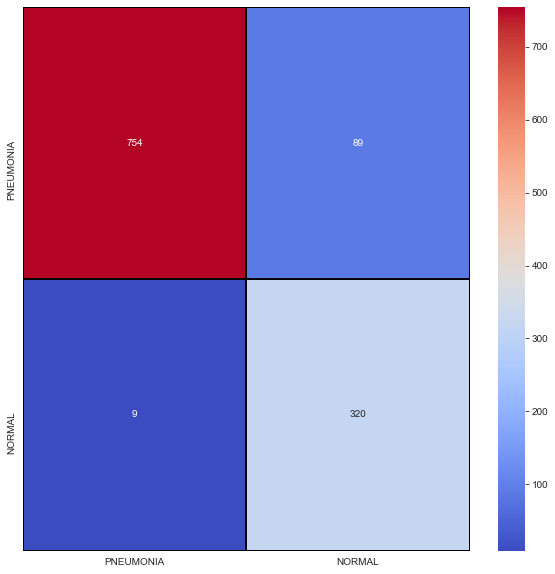

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(cmatrix,cmap= "coolwarm", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.show()

**Based on the confusion matrix results:**
1. True positives = 754 
2. True negatives = 320
3. False negatives = 89
4. False positives = 9
    

In [48]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

### Correction Predictions for either pneumonia or healthy lungs
#### 1. Pneumonia (Class 0)
#### 2. Healthy (Class 1) 

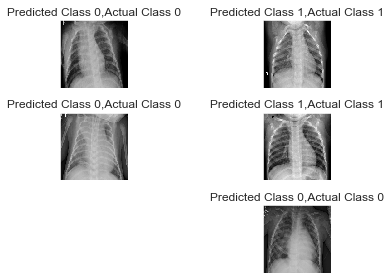

In [81]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150), cmap="gray")
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Incorrect predictions for either pneumonia or healthy lungs
#### 1. Pneumonia (Class 0)
#### 2. Healthy (Class 1) 

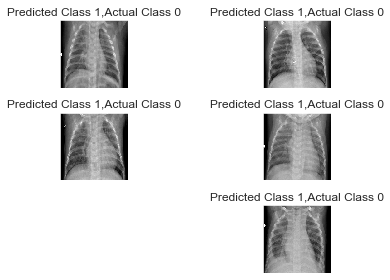

In [80]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150), cmap="gray")
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

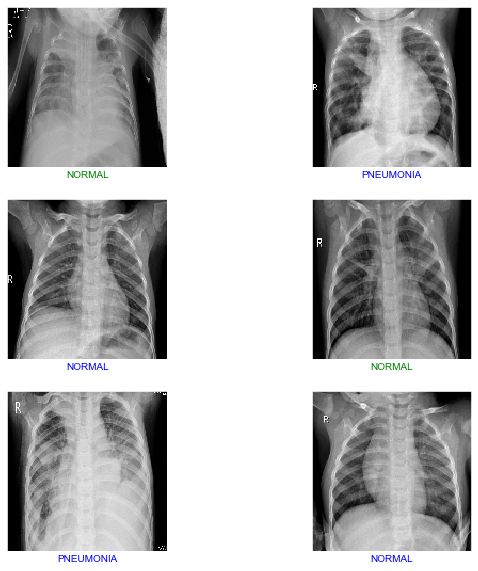

In [36]:
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, img_size, img_size)[i], cmap='gray')
    if(binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='green')
plt.show()

### Model Performance at larger scale
#### Blue = Correct Prediction
#### Green = Incorrect Prediction

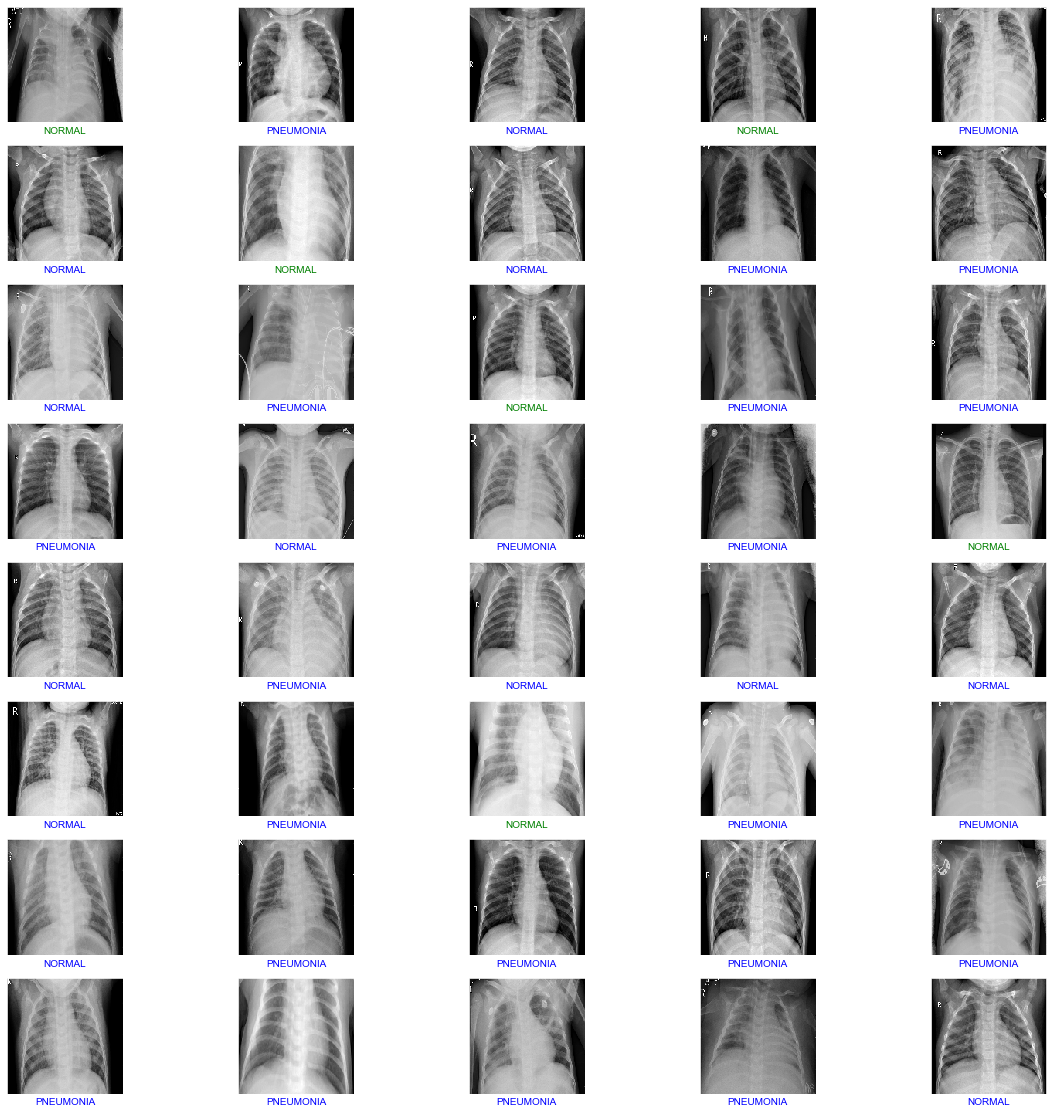

In [99]:
plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(8,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, img_size, img_size)[i], cmap='gray')
    if(binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='green')
plt.show()